# España no escucha a la OMS y aumenta la tasa de cesáreas hasta el 25%
(Spain does not listen to WHO and cesarean rate increases to 25%) 

# http://www.publico.es/espana/espana-no-escucha-oms-y.html (03/05/2015)

The objective of this study is to check if the the holder and the content of this article is true. 
So we've extracted information supplied in healing ministry since 1996 until 2013.

http://www.msssi.gob.es/estadisticas/microdatos.do)


In [341]:
import numpy as np 
import pandas as pd
from pandas import DataFrame,Series
import matplotlib.pyplot as plt
%matplotlib inline
import pylab

The information until 2009 is a text file for each year that explain all the surgical activity in each Spain hospital.

In [342]:
path_to_files = '/home/dsc/shared_with_win/2009metadatos/'

In [343]:
! ls {path_to_files}

FILIACION 2009.txt  restact_1.txt    restact2004.txt  restact2009.txt
restact1996.txt     restact2000.txt  restact2005.txt  restact.txt
restact1997.txt     restact2001.txt  restact2006.txt
restact1998.txt     restact2002.txt  restact2007.txt
restact1999.txt     restact2003.txt  restact2008.txt


The file structure is:

Campo   Literal
1	Código Hospital C.N.H.
2	Año al que corresponde la Estadística
3	1ª consultas hospital en medicina y es médicas
4	Consultas totales hospital en medicina y es médicas
5	1ª consultas centro de es en medicina y es médicas
6	Consultas totales centro de es en medicina y es médicas
7	1ª consultas hospital en medicina y es  quirúrgicas
8	Consultas totales hospital en medicina y es  quirúrgicas
9	1ª consultas centro de especialidades en medicina y es  quirúrgicas
10	Consultas totales centro de especialidades en medicina y es quirúrgicas
11	1ª consultas hospital en traumatología
12	Consultas totales hospital en traumatología 
13	1ª consultas centro de especialidades en traumatología 
14	Consultas totales centro de especialidades en traumatología
15	1ª consultas hospital en obstetricia-ginecología
16	Consultas totales hospital en obstetricia-ginecología 
17	1ª consultas centro de especialidades en obstetricia-ginecología 
18	Consultas totales centro de especialidades en obstetricia-ginecología
19	1ª consultas hospital en obstetricia
20	Consultas totales hospital en obstetricia 
21	1ª consultas centro de especialidades en obstetricia 
22	Consultas totales centro de especialidades en obstetricia
23	1ª consultas hospital en ginecología
24	Consultas totales hospital en ginecología 
25	1ª consultas centro de especialidades en ginecología 
26	Consultas totales centro de especialidades en ginecología
27	1ª consultas hospital en pediatría
28	Consultas totales hospital en pediatría 
29	1ª consultas centro de especialidades en pediatría 
30	Consultas totales centro de especialidades en pediatría
31	1ª consultas hospital en medicina pediátrica
32	Consultas totales hospital en medicina pediátrica 
33	1ª consultas centro de especialidades en medicina pediátrica 
34	Consultas totales centro de especialidades en medicina pediátrica
35	1ª consultas hospital en cirugía pediátrica
36	Consultas totales hospital en cirugía pediátrica 
37	1ª consultas centro de especialidades en cirugía pediátrica 
38	Consultas totales centro de especialidades en cirugía pediátrica
39	1ª consultas hospital en neonatología
40	Consultas totales hospital en neonatología 
41	1ª consultas centro de especialidades en neonatología 
42	Consultas totales centro de especialidades en neonatología
43	1ª consultas hospital en rehabilitación
44	Consultas totales hospital en rehabilitación 
45	1ª consultas centro de especialidades en rehabilitación 
46	Consultas totales centro de especialidades en rehabilitación
47	1ª consultas hospital en psiquiatría
48	Consultas totales hospital en psiquiatría 
49	1ª consultas centro de especialidades en psiquiatría 
50	Consultas totales centro de especialidades en psiquiatría
51	1ª consultas hospital en preanestesia
52	Consultas totales hospital en preanestesia 
53	1ª consultas centro de especialidades en preanestesia 
54	Consultas totales centro de especialidades en preanestesia
55	1ª consultas hospital en Otros-1
56	Consultas totales hospital en Otros-1 
57	1ª consultas centro de especialidades en Otros-1 
58	Consultas totales centro de especialidades en Otros-1
59	1ª consultas hospital en Otros-2
60	Consultas totales hospital en Otros-2 
61	1ª consultas centro de especialidades en Otros-2 
62	Consultas totales centro de especialidades en Otros-2
63	1ª consultas hospital en Otros-3
64	Consultas totales hospital en Otros-3 
65	1ª consultas centro de especialidades en Otros-3 
66	Consultas totales centro de especialidades en Otros-3
67	1ª consultas hospital en TOTAL HOSPITAL
68	Consultas totales hospital en TOTAL HOSPITAL 
69	1ª consultas centro de especialidades en TOTAL HOSPITAL 
70	Consultas totales centro de especialidades en TOTAL HOSPITAL
71	Estudios rayos X en hospital
72	Estudios rayos X en centro de especialidades
73	TAC en hospital
74	TAC en  centro de especialidades
75	Resonancias magnéticas en hospital
76	Resonancias magnéticas en  centro de especialidades
77	Estudios de hemodinámica en hospital
78	Estudios de angiografía digital en hospital
79	Gamamagrafías en hospital
80	Determinanciones totales en hospital
81	Determinanciones totales en centro de especialidades
82	Biopsias en hospital
83	Biopsias en centro de especialidades
84	Necropsias totales
85	Necropsias en fallecimientos perinatales
86	Actos quirúrgicos programados  anestesia general con hospitalización
87	Actos quirúrgicos programados anestesia gral. con  cirugía mayor ambulatoria
88	Cirugía extracorpórea programada con hospitalización
89	Actos quirúrgicos programados  anestesia local  con hospitalización
90	Actos quirúrgicos programados anestesia local  con con cirugía mayor ambulatoria
91	Actos quirúrgicos programados  anestesia local  resto de intervenciones ambulatoria
92	TOTAL ACTOS QUIRÚRGICOS PROGRAMADOS CON HOSPITALIZACIÓN
93	TOTAL ACTOS QUIRÚRGICOS PROGRAMADOS CIRUGÍA MAYOR AMBULATORIA
94	TOTAL ACTOS QUIRÚRGICOS PROGRAMADOS RESTO INTER AMBULATORIA
95	Actos Quirúrgicos urgentes anestesia general con hospitalización
96	Cirugía extracorpórea urgente con hospitalización
97	Actos quirúrgicos urgentes anestesia local  con hospitalización
98	Actos quirúrgicos urgentes anestesia local  resto de intervenciones ambulatoria
99	TOTAL ACTOS QUIRÚRGICOS URGENTES CON HOSPITALIZACIÓN
100	TOTAL ACTOS QUIRÚRGICOS URGENTES RESTO INTERVENCIONES AMBULATORIAS
101	ACTOS QUIRÚRGICOS TOTALES CON HOSPITALIZACIÓN
102	ACTOS QUIRÚRGICOS TOTALES CON CIRUGÍA MAYOR AMBULATORIA
103	ACTOS QUIRÚRGICOS TOTALES RESTO INTERVENCIONES AMBULATORIAS
104	Partos por vía vaginal
105	Cesáreas
106	Recién nacidos vivos
107	Recién nacidos vivos < 2500 g
108	Recién nacidos vivos < 28 semanas
109	Fallecimientos perinatales
110	Fallecimientos neonatales precoces
111	Fallecimientos maternales
112	Altas en el Servicio de Urgencias
113	Ingresos por el Servicio de Urgencias
114	Traslados desde  el Servicio de Urgencias
115	Fallecimientos  en el Servicio de Urgencias
116	URGENCIAS TOTALES
117	Técnicas de radiología intervencionista
118	Litofragmentación renal
119	Pacientes totales hospital de día geriátrico
120	Visitas totales hospital de día geriátrico
121	Pacientes totales hospital de día psiquiátrico
122	Visitas totales hospital de día psiquiátrico
123	Pacientes totales hospital de día quimioterapia
124	Sesiones totales hospital de día quimioterapia
125	Pacientes totales hospital de día Otros
126	Visitas totales hospital de día Otros
127	Pacientes totales hospitalización a domicilio
128	Visitas totales  hospitalización a domicilio
129	Pacientes totales oncología radioterápica
130	Sesiones totales oncología radioterápica
131	Pacientes totales oncología quimioterápica
132	Sesiones totales oncología quimioterápica
133	Pacientes totales rehabilitación
134	Sesiones totales rehabilitación
135	Pacientes totales hemodiálisis
136	Sesiones totales hemodiálisis
137	Pacientes totales diálisis peritoneal domiciliaria
138	Sesiones totales diálisis peritoneal domiciliaria
139	Transfusiones de sangre total
140	Transfusiones de concentrado de hematíes
141	Transfusiones de concentrado de plaquetas
142	Transfusiones de plasma fresco congelado
143	Transfusiones de plasma fresco no congelado
144	Transfusiones de crioprecitado
145	Lista de Espera 1ª consulta total medicina y espec. médicas
146	Lista de Espera 1ª consulta> 2 meses medicina y espec. médicas
147	Lista de Espera hospitalización  total medicina y espec. médicas
148	Lista de Espera hospitalización> 6 meses medicina y espec. médicas
149	Lista de Espera 1ª consulta total cirugía y espec. quirúrgicas
150	Lista de Espera 1ª consulta> 2 meses cirugía y espec. quirúrgicas
151	Lista de Espera hospitalización  total cirugía y espec. quirúrgicas
152	Lista de Espera hospitalización> 6 meses cirugía y espec. quirúrgicas
153	Lista de Espera cirugía ambulatoria  total cirugía y espec. quirúrgicas
154	Lista de Espera cirugía ambulatoria> 6 meses cirugía y espec. quirúrgicas
155	Lista de Espera 1ª consulta total traumatología
156	Lista de Espera 1ª consulta> 2 meses traumatología
157	Lista de Espera hospitalización  total traumatología
158	Lista de Espera hospitalización> 6 meses traumatología
159	Lista de Espera cirugía ambulatoria  total traumatología
160	Lista de Espera cirugía ambulatoria> 6 meses traumatología
161	Lista de Espera 1ª consulta total obstetricia-ginecología
162	Lista de Espera 1ª consulta> 2 meses obstetricia-ginecología
163	Lista de Espera hospitalización  total obstetricia-ginecología
164	Lista de Espera hospitalización> 6 meses obstetricia-ginecología
165	Lista de Espera 1ª consulta total obstetricia
166	Lista de Espera 1ª consulta> 2 meses obstetricia
167	Lista de Espera hospitalización  total obstetricia
168	Lista de Espera hospitalización> 6 meses obstetricia
169	Lista de Espera 1ª consulta total ginecología
170	Lista de Espera 1ª consulta> 2 meses ginecología
171	Lista de Espera hospitalización  total ginecología
172	Lista de Espera hospitalización> 6 meses ginecología
173	Lista de Espera cirugía ambulatoria  total ginecología
174	Lista de Espera cirugía ambulatoria> 6 meses ginecología
175	Lista de Espera 1ª consulta total pediatría
176	Lista de Espera 1ª consulta> 2 meses pediatría
177	Lista de Espera hospitalización  total pediatría
178	Lista de Espera hospitalización> 6 meses pediatría
179	Lista de Espera 1ª consulta total medicina pediátrica
180	Lista de Espera 1ª consulta> 2 meses medicina pediátrica
181	Lista de Espera hospitalización  total medicina pediátrica
182	Lista de Espera hospitalización> 6 meses medicina pediátrica
183	Lista de Espera 1ª consulta total cirugía pediátrica
184	Lista de Espera 1ª consulta> 2 meses cirugía pediátrica
185	Lista de Espera hospitalización  total cirugía pediátrica
186	Lista de Espera hospitalización> 6 meses cirugía pediátrica
187	Lista de Espera cirugía ambulatoria  total cirugía pediátrica
188	Lista de Espera cirugía ambulatoria> 6 meses cirugía pediátrica
189	Lista de Espera 1ª consulta total rehabilitación
190	Lista de Espera 1ª consulta> 2 meses rehabilitación
191	Lista de Espera hospitalización  total rehabilitación
192	Lista de Espera hospitalización> 6 meses rehabilitación
193	Lista de Espera hospitalización  total larga estancia
194	Lista de Espera hospitalización> 6 meses larga estancia
195	Lista de Espera 1ª consulta total psiquiatría
196	Lista de Espera 1ª consulta> 2 meses psiquiatría
197	Lista de Espera hospitalización  total psiquiatría
198	Lista de Espera hospitalización> 6 meses psiquiatría
199	Lista de Espera 1ª consulta total radiología
200	Lista de Espera 1ª consulta> 2 meses radiología
201	Lista de Espera 1ª consulta total Otras
202	Lista de Espera 1ª consulta> 2 meses Otras
203	Lista de Espera hospitalización  total Otras
204	Lista de Espera hospitalización> 6 meses Otras
205	Lista de Espera cirugía ambulatoria  total Otras
206	Lista de Espera cirugía ambulatoria> 6 meses Otras
207	LISTA DE ESPERA 1ª CONSULTA TOTAL TOTAL HOSPITAL
208	LISTA DE ESPERA> 2 MESES TOTAL HOSPITAL
209	LISTA DE ESPERA HOSPITALIZACIÓN TOTAL TOTAL HOSPITAL
210	LISTA DE ESPERA HOSPITALIZACIÓN> 6 MESES TOTAL HOSPITAL
211	LISTA DE ESPERA CIRUGÍA AMBULATORIA TOTAL TOTAL HOSPITAL
212	LISTA DE ESPERA CIRUGÍA AMBULATORIA> 6 MESES TOTAL HOSPITAL
213	Otra Actividad en Consultas 1 (*)
214	Otra Actividad en Consultas 2 (*)
215	Otra Actividad en Consultas 3 (*)
216	Otra Actividad para Pacientes en Lista de Espera (*)


We are interested on :
Campo   Literal
1	Código Hospital C.N.H.
2	Año al que corresponde la Estadística
104	Partos por vía vaginal
105	Cesáreas

In [344]:
###Then  we have must know how many rows have the files.
!cat {path_to_files}restact*.txt |wc -l

11151


In [345]:
## totally there are 10934 so we are to see how many rows per year 

year =1996
while year < 2010:
    name ='restact'+str(year)+'.txt'
    print name
    !cat {path_to_files+name} |wc -l
    year=year+1  


restact1996.txt
788
restact1997.txt
788
restact1998.txt
780
restact1999.txt
774
restact2000.txt
771
restact2001.txt
768
restact2002.txt
759
restact2003.txt
741
restact2004.txt
750
restact2005.txt
751
restact2006.txt
746
restact2007.txt
764
restact2008.txt
767
restact2009.txt
770


In [346]:
 !cat {path_to_files}restact1996.txt

493;1996;33;1253;0;0;1064;2514;0;0;2961;9941;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;537;2076;0;0;0;0;0;0;3287;6728;0;0;0;0;0;0;0;0;0;0;0;0;0;0;7882;22512;0;0;19090;0;0;0;0;0;0;0;0;92134;0;0;0;0;0;1453;1281;0;0;439;390;1453;1720;390;0;0;0;0;0;0;1453;1720;390;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;2025;24300;0;0;0;0;146;86;4;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;215;7;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;215;7;0;0;;;;
620;1996;6557;24387;0;0;9925;27239;0;0;1996;4760;0;0;3464;9274;0;0;449;3938;0;0;3015;5336;0;0;1488;4244;0;0;1488;4244;0;0;0;0;0;0;0;0;0;0;1055;3062;0;0;313;3570;0;0;1136;1136;0;0;409;1664;0;0;0;0;0;0;0;0;0;0;26343;79336;0;0;32421;0;0;0;0;0;0;0;0;1194080;0;2319;0;0;0;1133;0;0;0;207;1537;1133;207;1537;414;0;0;379;414;379;1547;207;1916;331;47;378;12;0;1;0;0;11066;2357;230;30;13683;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;475;10440;0;0;0;0;76;988;0;30;0;0;347;10;0;0;1546;1159;299;85;0;0;79;0;1

In [347]:
df=pd.read_csv(path_to_files+'restact1996.txt',sep=';',header=None)[[0,1,103,104]]
df.rename(columns={0:'NHDC'},inplace=True)
df.rename(columns={1:'Year'},inplace=True)
df.rename(columns={103:'Partos_vag'},inplace=True)
df.rename(columns={104:'Cesareas'},inplace=True)
df_def=df.copy()

In [348]:
year =1997
while year <2010:
    name ='restact'+str(year)+'.txt'
    df_aux=pd.read_csv(path_to_files+name ,sep=';',header=None)[[0,1,103,104]]
    df_aux.rename(columns={0:'NHDC'},inplace=True)
    df_aux.rename(columns={1:'Year'},inplace=True)
    df_aux.rename(columns={103:'Partos_vag'},inplace=True)
    df_aux.rename(columns={104:'Cesareas'},inplace=True)
    df_def=df_def.append(df_aux)
    year=year+1  
    


In [349]:
df_def

,NHDC,Year,Partos_vag,Cesareas
0,493,1996,0,0
1,620,1996,331,47
2,554,1996,943,222
3,209,1996,110,39
4,523,1996,0,0
5,697,1996,675,165
6,256,1996,0,0
7,287,1996,1079,270
8,692,1996,688,148
9,335,1996,0,0


After 2009 the files are Xml because Data Bases change  and only have files about obstetricy activities with Excel program we transform to csv files  

In [350]:
path_to_files = '/home/dsc/shared_with_win/2010METADATOS/'
df=pd.read_csv(path_to_files+'2010.csv',sep=';')[[1,0,2,3]]
df_def=df_def.append(df)


In [351]:
df_def

,NHDC,Year,Partos_vag,Cesareas
0,493,1996,0,0
1,620,1996,331,47
2,554,1996,943,222
3,209,1996,110,39
4,523,1996,0,0
5,697,1996,675,165
6,256,1996,0,0
7,287,1996,1079,270
8,692,1996,688,148
9,335,1996,0,0


In [352]:
year =2011
while year <2014:
    name =str(year)+'.csv'
    df_aux=pd.read_csv(path_to_files+name ,sep=';')[[1,0,2,3]]
    df_def=df_def.append(df_aux)
    year=year+1  
    

In [353]:
df_def["Total_Partos"]= df_def.Cesareas+df_def.Partos_vag
df_def=df_def[df_def["Total_Partos"]>0]
##there are hospitals that no have obstetrician section

In [354]:
df_totales_year=df_def.groupby("Year")["Total_Partos","Cesareas","Partos_vag"].sum()
df_totales_year
df_totales_year["proporcion_cesareas"]=df_totales_year.Cesareas/df_totales_year.Total_Partos
df_totales_year["proporcion_cesareas"]=df_totales_year.proporcion_cesareas*100
df_totales_year["proporcion_cesareas"]=df_totales_year["proporcion_cesareas"].round(decimals=2)

In [360]:
df_porcentajes['Cesareas']=df_totales_year[["proporcion_cesareas"]]



In [361]:
df_porcentajes=df_porcentajes.drop('Naturales',axis=1)

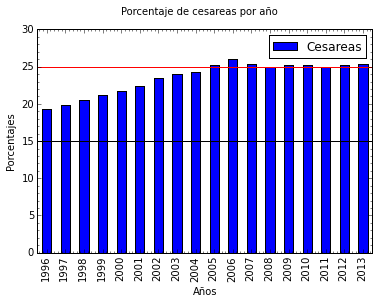

In [363]:
plt.ion() 
df_porcentajes.plot(kind='bar')
plt.axhline(25, color='r',label='25%')
plt.axhline(15, color='k',label=u'Max OMS recommended')
plt.suptitle(u'Porcentaje de cesareas por año')  
plt.minorticks_on()
plt.xlabel(u'Años')
plt.ylabel('Porcentajes')



So we can say that this information is true but we continue study de data...... 